In [1]:
#! /usr/bin/env python

In [2]:
# import modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras.losses import mean_squared_error
from keras import metrics

In [3]:
# pull dataset
nutrition = pd.read_pickle("./Nutrition_Full_Features.pkl")

In [4]:
#drop rows with NaN
nutrition = nutrition.dropna()

In [5]:
#Data for features
X_original = nutrition.iloc[:, 11:]
y = nutrition.iloc[:, 7]
y = y.to_numpy()

In [6]:
# normalise the data by feature column
X = preprocessing.normalize(X_original, axis=0)
X = pd.DataFrame(X_original, columns = X_original.columns) # processing loses columns headers so these must be reestablished
X = X.to_numpy()

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [8]:
#building keras Neural Network model

from keras.layers import Dense, Activation
from keras.models import Sequential
from keras import losses

# model type
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(8, activation = 'relu', input_dim = 40))

# Adding the second hidden layer
model.add(Dense(units = 16, activation = 'relu'))

# Could create for loop to check number of layers

#avoids overfitting
#https://keras.io/api/layers/regularization_layers/dropout/
model.add(keras.layers.Dropout(0.1))


# Adding the output layer
model.add(Dense(units = 1))


# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])#=history

# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 461784.3911 - accuracy: 0.0041
Epoch 2/100
84/84 [==============================] - 0s 997us/step - loss: 140795.6934 - accuracy: 3.8802e-04
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 60131.8918 - accuracy: 0.0000e+00
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 32169.8006 - accuracy: 0.0000e+00
Epoch 5/100
84/84 [==============================] - 0s 1ms/step - loss: 39632.4109 - accuracy: 0.0000e+00
Epoch 6/100
84/84 [==============================] - 0s 997us/step - loss: 32562.2803 - accuracy: 0.0000e+00
Epoch 7/100
84/84 [==============================] - 0s 973us/step - loss: 26444.2024 - accuracy: 2.9606e-04: 0s - loss: 26640.9823 - accuracy: 0.0000e+0
Epoch 8/100
84/84 [==============================] - 0s 937us/step - loss: 28106.5534 - accuracy: 0.0000e+00
Epoch 9/100
84/84 [==============================] - 0s 896us/step - loss: 19740.8975 - accur

84/84 [==============================] - 0s 1ms/step - loss: 92.4067 - accuracy: 0.0000e+00
Epoch 77/100
84/84 [==============================] - 0s 961us/step - loss: 30.2192 - accuracy: 0.0000e+00
Epoch 78/100
84/84 [==============================] - 0s 1ms/step - loss: 75.5685 - accuracy: 0.0000e+00
Epoch 79/100
84/84 [==============================] - 0s 1ms/step - loss: 52.9046 - accuracy: 0.0000e+00
Epoch 80/100
84/84 [==============================] - 0s 973us/step - loss: 17.7010 - accuracy: 0.0000e+00
Epoch 81/100
84/84 [==============================] - 0s 1ms/step - loss: 17.3360 - accuracy: 0.0000e+00
Epoch 82/100
84/84 [==============================] - 0s 963us/step - loss: 16.1598 - accuracy: 0.0000e+00
Epoch 83/100
84/84 [==============================] - 0s 1ms/step - loss: 46.9377 - accuracy: 0.0000e+00
Epoch 84/100
84/84 [==============================] - 0s 1ms/step - loss: 28.4350 - accuracy: 0.0000e+00
Epoch 85/100
84/84 [==============================] - 0s 987us

In [9]:
#model evaluation
score = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 9.15984058380127 / Test accuracy: 0.0


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


In [11]:
print('Scores without tuning: {}'.format(score))

Scores without tuning: [9.15984058380127, 0.0]


In [12]:
# get predicted values
y_pred = model.predict(X_test)

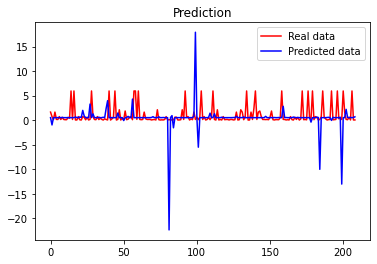

In [13]:
# plot predicted values against test values
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [14]:
# checking the output metrics
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4077091019936157
Mean Squared Error: 9.159841545650027
Root Mean Squared Error: 3.026523012575656


In [15]:
y_mean = np.mean(y)
y_std = np.std(y)
print('Output Standard Deviation:', y_std)
print('Output Mean:', y_mean)

Output Standard Deviation: 1.6110865075846403
Output Mean: 0.8464732245681383


# Hyper Parameter Tuning Section

In [16]:
import kerastuner
from kerastuner import HyperModel

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=64, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid','softmax']),
        input_dim = 40
        )
             
    )

    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=64, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid','softmax'])
        )
             
    )
    
    model.add(
        keras.layers.Dropout(
            hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    step=0.01)
        )
    )

    # Adding the output layer
    model.add(Dense(units = 1))


    model.compile(
        optimizer = hp.Choice('dense_optimizer',
                values=['adam','SGD','rmsprop','adadelta'] ),
        loss = 'mean_squared_error',
        metrics = ['accuracy'],
    )
    return model

In [17]:
tuner = kerastuner.tuners.RandomSearch(
            build_model,
            objective='accuracy',
            max_trials=200,
            executions_per_trial=2,
            project_name='hp_values',
            overwrite=True)

In [18]:
tuner.search(X_train, y_train, epochs=10)

Trial 180 Complete [00h 00m 04s]
accuracy: 0.0006002400768920779

Best accuracy So Far: 0.0012004801537841558
Total elapsed time: 00h 12m 18s

Search: Running Trial #181

Hyperparameter    |Value             |Best Value So Far 
units             |32                |24                
dense_activation  |sigmoid           |softmax           
dropout           |0.09              |0.02              
dense_optimizer   |SGD               |SGD               

Epoch 1/10
27/27 [==============================] - 1s 3ms/step - loss: 2.2086 - accuracy: 0.0000e+00
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 2.3581 - accuracy: 0.0010
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 2.0544 - accuracy: 0.0000e+00
Epoch 4/10
27/27 [==============================] - 0s 3ms/step - loss: 2.2411 - accuracy: 0.0000e+00
Epoch 5/10
27/27 [==============================] - 0s 3ms/step - loss: 2.0103 - accuracy: 0.0000e+00
Epoch 6/10
27/27 [===================

KeyboardInterrupt: 

In [ ]:
#collect best hyperparameters to rebuild model
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

In [ ]:
# get new predicted values with Hyperparameters
y_hp_pred = model.predict(X_test)

In [ ]:
# plot predicted values against test values
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_hp_pred, color = 'blue', label = 'HP Predicted data')
plt.title('HP Prediction')
plt.legend()
plt.show()

In [ ]:
# checking the output metrics
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hp_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hp_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hp_pred)))

y_mean = np.mean(y_hp_pred)
y_std = np.std(y_hp_pred)
print('Output Standard Deviation:', y_std)
print('Output Mean:', y_mean)